In [2]:
import pandas as pd
import numpy as np

Filling Missing Values 'none' and 'None'

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [4]:
outcome = train['outcome']
outcome.head(1)

0    died
Name: outcome, dtype: object

In [5]:
train = train[['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
               'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
              'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
               'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
               'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
               'packed_cell_volume', 'total_protein', 'abdomo_appearance',
               'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
               'cp_data']]

In [6]:
train.describe()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1235.0000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,617.0000,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,356.6581,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,0.0000,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,308.5000,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,617.0000,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,925.5000,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,1234.0000,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1235 non-null   object 
 8   peripheral_pulse       1235 non-null   object 
 9   mucous_membrane        1235 non-null   object 
 10  capillary_refill_time  1235 non-null   object 
 11  pain                   1235 non-null   object 
 12  peristalsis            1235 non-null   object 
 13  abdominal_distention   1235 non-null   object 
 14  nasogastric_tube       1235 non-null   object 
 15  naso

In [8]:
train.shape


(1235, 28)

In [9]:
# Replace None with NaN using replace()
# train.replace(to_replace=None, value=np.nan, inplace=True)
# train = train.fillna(value=np.nan)
value_to_replace = 'none'
# column_to_replace_in = 'temp_of_extremities'
# train.loc[train[column_to_replace_in] ==
#        value_to_replace, column_to_replace_in] = np.nan
columns_to_replace_in = train.columns  # .to_list()
for column in columns_to_replace_in:
    train.loc[train[column] == value_to_replace, column] = np.nan
columns_to_replace_in = test.columns  # .to_list()
for column in columns_to_replace_in:
    test.loc[test[column] == value_to_replace, column] = np.nan
#


In [10]:
test.isnull().sum()

id                         0
surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities        0
peripheral_pulse           0
mucous_membrane            0
capillary_refill_time      0
pain                       0
peristalsis                0
abdominal_distention     151
nasogastric_tube         165
nasogastric_reflux       225
nasogastric_reflux_ph      0
rectal_exam_feces          0
abdomen                    0
packed_cell_volume         0
total_protein              0
abdomo_appearance          0
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [11]:

# train.to_csv('train1.csv',index=False)
# test.to_csv('test1.csv',index=False)
# outcome.to_csv('outcome_train.csv',index=False)
train.isnull().sum()

id                         0
surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities        0
peripheral_pulse           0
mucous_membrane            0
capillary_refill_time      0
pain                       0
peristalsis                0
abdominal_distention     212
nasogastric_tube         275
nasogastric_reflux       331
nasogastric_reflux_ph      0
rectal_exam_feces          0
abdomen                    0
packed_cell_volume         0
total_protein              0
abdomo_appearance          0
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [12]:
train['temp_of_extremities'].fillna(
    train['temp_of_extremities'].mode()[0], inplace=True)
test['temp_of_extremities'].fillna(
    test['temp_of_extremities'].mode()[0], inplace=True)
train['peripheral_pulse'].fillna(
    train['peripheral_pulse'].mode()[0], inplace=True)
test['peripheral_pulse'].fillna(
    test['peripheral_pulse'].mode()[0], inplace=True)
train['capillary_refill_time'].fillna(
    train['capillary_refill_time'].mode()[0], inplace=True)
test['capillary_refill_time'].fillna(
    test['capillary_refill_time'].mode()[0], inplace=True)

In [13]:
# print(train["mucous_membrane"].unique())
print(train["abdominal_distention"].value_counts())
print(test["abdominal_distention"].value_counts())

moderate    543
slight      346
severe      111
None         23
Name: abdominal_distention, dtype: int64
moderate    329
slight      255
severe       67
None         22
Name: abdominal_distention, dtype: int64


In [14]:
column_to_impute = ['mucous_membrane', 'pain',
                    'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux']
for column in column_to_impute:
    train[column] = train[column].fillna(method='ffill')
    test[column] = test[column].fillna(method='ffill')

In [15]:
value_to_count = 'none'
c = test.columns
count_in_train = 0
count_in_test = 0
for i in c:
    count_in_train = count_in_train + (train[i] == value_to_count).sum()
    count_in_test = count_in_test + (test[i] == value_to_count).sum()
print(count_in_train)
print(count_in_test)

0
0


Data Visualisation

In [16]:
import matplotlib.pyplot as plt

In [17]:
test['age'].value_counts()


adult    782
young     42
Name: age, dtype: int64

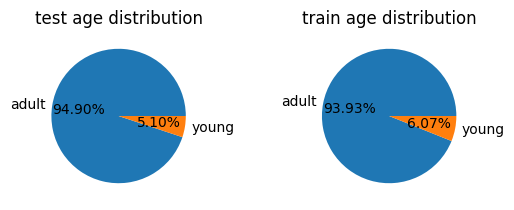

In [18]:
frequency = test['age'].value_counts()
frequency1 = train['age'].value_counts()
fig = plt.figure()
ax = fig.add_subplot(221)
ay = fig.add_subplot(222)
ax.pie(frequency, labels=['adult', 'young'], autopct='%1.2f%%')
ax.set_title('test age distribution')
ay.pie(frequency1, labels=['adult', 'young'], autopct='%1.2f%%')
ay.set_title('train age distribution')
plt.show()

In [19]:
test['surgery'].unique()


array(['no', 'yes'], dtype=object)

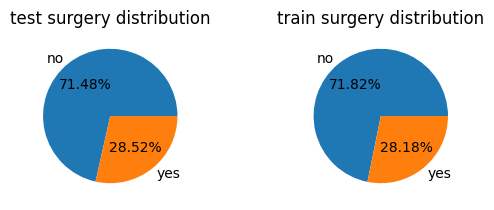

In [20]:
frequency = test['surgery'].value_counts()
frequency1 = train['surgery'].value_counts()
fig = plt.figure()
ax = fig.add_subplot(221)
ay = fig.add_subplot(222)
ax.pie(frequency, labels=['no', 'yes'], autopct='%1.2f%%')
ax.set_title('test surgery distribution')
ay.pie(frequency1, labels=['no', 'yes'], autopct='%1.2f%%')
ay.set_title('train surgery distribution')
plt.show()

Text(0.5, 1.0, 'Distribution of pulse')

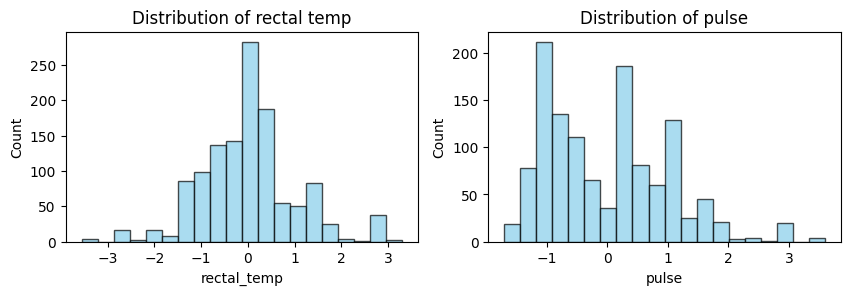

In [39]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(2, 2, 1)
ax1.hist(train['rectal_temp'], bins=20,
         color='skyblue', edgecolor='black', alpha=0.7)
# Set labels and title using the correct methods
ax1.set_xlabel('rectal_temp')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of rectal temp')
# ax2 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax2.hist(train['pulse'], bins=20,
         color='skyblue', edgecolor='black', alpha=0.7)
# Set labels and title using the correct methods
ax2.set_xlabel('pulse')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of pulse')

In [22]:
print(test["hospital_number"].value_counts())
print(train["hospital_number"].value_counts())
print("total number of hospital in test data: ",
      len(test["hospital_number"].unique()))
print("total number of hospital in train data: ",
      len(train["hospital_number"].unique()))

529461.0     35
528469.0     22
528548.0     21
5287179.0    18
528890.0     15
             ..
530439.0      1
528620.0      1
533736.0      1
530624.0      1
534163.0      1
Name: hospital_number, Length: 210, dtype: int64
529461.0     46
528548.0     32
528996.0     21
5290409.0    20
529667.0     20
             ..
532985.0      1
527526.0      1
535415.0      1
5289419.0     1
530157.0      1
Name: hospital_number, Length: 255, dtype: int64
total number of hospital in test data:  210
total number of hospital in train data:  255


In [23]:
train.describe()


,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1235.0000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,617.0000,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,356.6581,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,0.0000,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,308.5000,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,617.0000,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,925.5000,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,1234.0000,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


In [24]:
print("total number of rectal_temp in test data: ",
      len(test["rectal_temp"].unique()))
print("total number of rectal_temp in train data: ",
      len(train["rectal_temp"].unique()))

total number of rectal_temp in test data:  34
total number of rectal_temp in train data:  43


Normalizing rectal_temp and pulse column

In [25]:
from sklearn.preprocessing import StandardScaler


In [26]:
scaler = StandardScaler()
scaler.fit(train[['rectal_temp']])
train['rectal_temp'] = scaler.transform(train[['rectal_temp']])

In [27]:
scaler.fit(train[['pulse']])
train['pulse'] = scaler.transform(train[['pulse']])

In [28]:
scaler.fit(test[['rectal_temp']])
test['rectal_temp'] = scaler.transform(test[['rectal_temp']])
scaler.fit(test[['pulse']])
test['pulse'] = scaler.transform(test[['pulse']])

In [29]:
train.head(1)


,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0.0,yes,adult,530001.0,-0.129621,1.801773,24.0,cool,reduced,dark_cyanotic,...,distend_small,57.0,8.5,serosanguious,3.4,yes,2209.0,0.0,0.0,no


In [30]:
test.head(1)


,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1235.0,no,adult,534053.0,0.452957,-1.380223,20.0,normal,normal,normal_pink,...,distend_small,42.0,7.5,clear,2.3,no,0.0,0.0,0.0,no


Encoding Categorical Variable

Predictive Modelling

In [ ]:
outcome = train['outcome']
inputData = train[['surgery', 'age', 'rectal_temp', 'pulse',
                   'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
                  'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
                   'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
                   'abdomen',
                   'packed_cell_volume', 'total_protein',
                   'abdomo_protein', 'surgical_lesion', 'lesion_1',
                   'cp_data']]
outputData = test[['surgery', 'age', 'rectal_temp', 'pulse',
                   'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
                  'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
                   'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
                   'abdomen',
                   'packed_cell_volume', 'total_protein',
                   'abdomo_protein', 'surgical_lesion', 'lesion_1',
                   'cp_data']]

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC(kernel='sigmoid')
clf.fit(inputData, outcome)
y_pred = clf.predict(outputData)
y_pred
# 53.66 accuracy

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
k = 3  # Adjust the value of k as needed
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(inputData, outcome)
y_pred = knn_classifier.predict(outputData)
#63.66 accuracy

In [ ]:
# df2=pd.DataFrame(y_pred)
# submission=pd.concat([df1['id'],df2])
# submission.to_csv('/kaggle/working/',index=False)
submission = pd.DataFrame({'id': test['id'], 'outcome': y_pred})
submission.to_csv('submission.csv', index=False)
